In [1]:
#https://www.kaggle.com/code/sudalairajkumar/an-interactive-deep-dive-into-survey-results/notebook
#Some visualization technics are inspired from the above website.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
dataset = pd.read_excel("C:/Users/Nasibullah Qarizada/Desktop/data science/term project/AllDataARSAA.xlsx")

In [3]:
print(dataset.columns)

Index(['Response ID', 'Time Started', 'Date Submitted', 'Status', 'Contact ID',
       'Legacy Comments', 'Comments', 'Language', 'Referer', 'SessionID',
       ...
       'Income SPSS',
       'In the past 30 days, how frequently did you go shopping?',
       'Shopping Type', 'What is your highest education level?',
       'Eductaion SPSS', 'In What country do you currently reside?',
       'Country SPSS',
       'Other - Write In:In What country do you currently reside?',
       'How satisfied are you with our survey?', 'UID'],
      dtype='object', length=123)


In [4]:
dataset.drop('Response ID', axis=1, inplace=True)
dataset.drop('Contact ID', axis=1, inplace=True)
dataset.drop('Date Submitted', axis=1, inplace=True)
dataset.drop('Status', axis=1, inplace=True)
dataset.drop('Legacy Comments', axis=1, inplace=True)
dataset.drop('Comments', axis=1, inplace=True)
dataset.drop('Language', axis=1, inplace=True)
dataset.drop('Referer', axis=1, inplace=True)
dataset.drop('SessionID', axis=1, inplace=True)
dataset.drop('User Agent', axis=1, inplace=True)
dataset.drop('Tags', axis=1, inplace=True)
dataset.drop('Longitude', axis=1, inplace=True)
dataset.drop('Latitude', axis=1, inplace=True)
dataset.drop('IP Address', axis=1, inplace=True)
dataset.drop('Introduction Video', axis=1, inplace=True)
dataset.drop('Other - Write In:In What country do you currently reside?', axis=1, inplace=True)
dataset.drop('State/Region', axis=1, inplace=True)
dataset.drop('Postal', axis=1, inplace=True)
dataset.drop('UID', axis=1, inplace=True)
dataset.drop('Presentation of our Augmented Reality Shopping Application:', axis=1, inplace=True)



In [5]:
print(len(dataset.columns))

103


**Kitlemizi taniyalim!**


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Switzerland'),
  Text(3, 0, 'United States')])

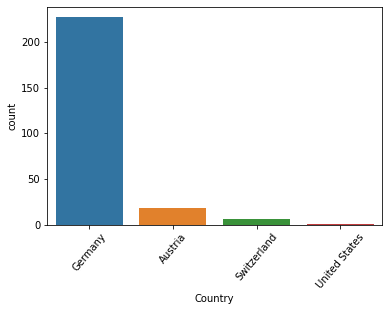

In [6]:
sns.countplot(x='Country', data=dataset, order=dataset.Country.value_counts().iloc[:10].index)
plt.xticks(rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Berlin'),
  Text(1, 0, 'Vienna'),
  Text(2, 0, 'Hamburg'),
  Text(3, 0, 'Koln'),
  Text(4, 0, 'Munich'),
  Text(5, 0, 'Nurnberg'),
  Text(6, 0, 'Leipzig'),
  Text(7, 0, 'Munster'),
  Text(8, 0, 'Essen'),
  Text(9, 0, 'Dresden')])

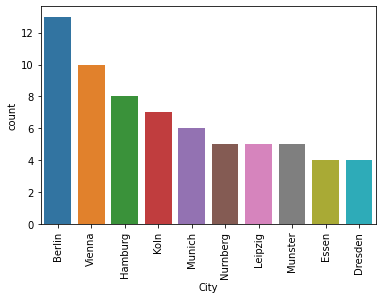

In [7]:
# plot dfe
sns.countplot(x='City', data=dataset, order=dataset.City.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [8]:
temp_series = dataset['What is your gender?'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution',
    width=400, height=400
    )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

In [10]:
dataset['What is your gender?'].value_counts()

Female     132
Male       118
Diverse      2
Name: What is your gender?, dtype: int64

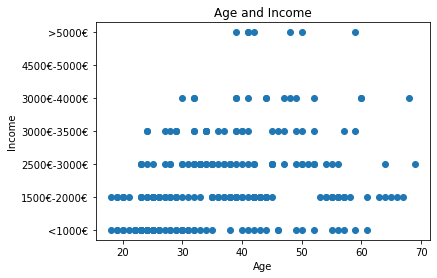

In [ ]:
import matplotlib.pyplot as plt


Age = dataset['What is your age?']
Income = dataset['Income SPSS']

plt.scatter(Age, Income)
plt.title("Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.yticks(np.arange(1,8), ["<1000€", "1500€-2000€", "2500€-3000€", "3000€-3500€", "3000€-4000€", "4500€-5000€", ">5000€"])
plt.show()

In [ ]:
cnt_srs = dataset['In the past 30 days, how frequently did you go shopping?'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Shopping Frequency distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="formaleducation")


In [ ]:
temp_series = dataset['What is your highest education level?'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Education distribution',
 
    )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

In [ ]:
dataset.loc[dataset['What is your age?']<=27, 'Age SPSS'] = '18 to 27'
dataset.loc[dataset['What is your age?'].between(28,37), 'Age SPSS'] = '28 to 37'
dataset.loc[dataset['What is your age?'].between(38,47), 'Age SPSS'] = '38 to 47'
dataset.loc[dataset['What is your age?'].between(48,57), 'Age SPSS'] = '48 to 57'
dataset.loc[dataset['What is your age?'].between(58,67), 'Age SPSS'] = '58 to 67'
dataset.loc[dataset['What is your age?']>68, 'Age SPSS'] = '68 to 100'

In [ ]:
dataset['Age SPSS'].value_counts()

28 to 37     70
38 to 47     66
18 to 27     64
48 to 57     36
58 to 67     14
68 to 100     1
Name: Age SPSS, dtype: int64

In [ ]:
cnt_srs = dataset['Age SPSS'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = np.random.randn(5),
        showscale=False
    ),
)

layout = go.Layout(
    title='Age distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Age")

In [ ]:
cnt_srs = dataset['What is your approximate average net income per month?'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = np.random.randn(10),
        showscale=False
    ),
)

layout = go.Layout(
    title='Income distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Age")

# ---------------------------------------------------------------------------------------------------------------


In [ ]:
dataset['What is your age?'].mean()

37.38095238095238